<a href="https://colab.research.google.com/github/adilimam12/Regression-capstone-project2/blob/main/TED_Talk_Views_Prediction2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ted talk views prediction**







Regression

**Team-curio monks**

presented by:

Adil imam

Asadullah pathan

Sushil kumar singh

Md sazil sharif

Madhulika kumari

# Project Summary

---




A TED talk is a recorded public-speaking presentation that was originally given at the main TED (technology, entertainment and design) annual event or one of its many satellite events around the world. TED is a non-profit devoted to spreading ideas, usually in the form of short, powerful talks, often called "TED talks." TED is dedicated to researching and sharing knowledge that matters through short talks and presentations. Their goal is to inform and educate global audiences in an accessible way.

We have Started with data loading and we have done EDA, feature engineering, data cleaning, target encoding feature selection and then model building.

So, we have used this models:

Linear Regressor
Random Forest Regressor 
XGBOOST Regressor.

As we know, RMSE is more influenced by outliers MAE doesn't increase with outliers.

MAE is linear and RMSE is quadratically increasing.
So, We chosen MAE as a deciding factor for our model.

On the basis of MAE, the best performing regression model is Random Forest Regressor.



## **Git Hub link**

---




Adil imam- https://github.com/adilimam12/Regression-capstone-project2

# **Problem Statement**

---





TED is devoted to spreading powerful ideas on just about any topic. This dataset contain over 4,005 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

TED talks have been given for many years with the platform of "Ideas Worth Spreading". In the digital world we live in today, TED is a great platform to get your idea out there. But how do you know if your idea will be heard or appreciated.

**Objective**

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

**A TED talk is a recorded public-speaking presentation that was originally given at the main TED (technology, entertainment and design)**.

---



TED Conferences, LLC is an American-Canadian non-profit media organization that posts international talks online for free distribution under the slogan "ideas worth spreading"

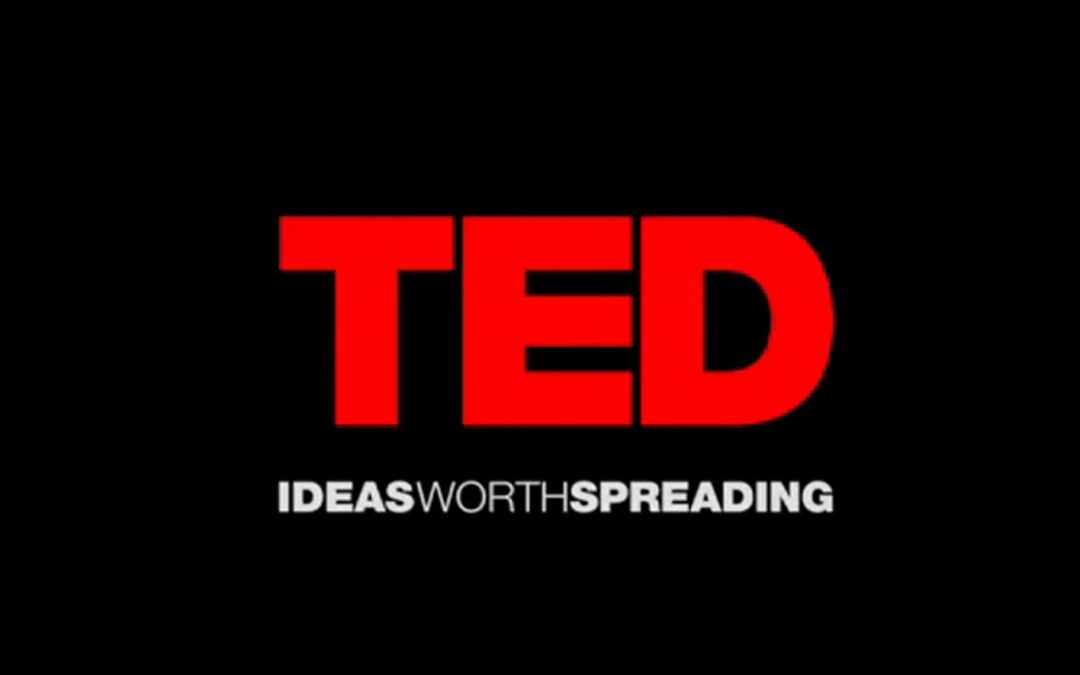

**Project Work flow**

Steps followed:

1)Data Preparation

2)EDA

3)Feature engineering

4)Data cleaning

5)Model buliding

6)Evaluation of models

**Libraries used in this Project:**

---



Datawrangling:

Numpy

Pandas

For Graphing:

Matplotib

Seaborn

Machine learning:

Scikit-Learn

SK-Opt

XGBoost

CatBoost

# **Data preparation**

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

**Loading the Data**

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tedtalk_df=pd.read_csv("/content/drive/MyDrive/almabetter/capstone project2/data_ted_talks .csv")

**Some insights of the data**

In [ ]:
tedtalk_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


**The dataset contains features like:**

talk_id: Talk identification number provided by TED

title: Title of the talk

speaker_1: First speaker in TED's speaker list

all_speakers: Speakers in the talk

occupations: Occupations of the speakers

about_speakers: Blurb about each speaker

recorded_date: Date the talk was recorded

published_date: Date the talk was published to TED.com

event: Event or medium in which the talk was given

native_lang: Language the talk was given in

available_lang: All available languages (lang_code) for a talk

comments: Count of comments

duration: Duration in seconds

topics: Related tags or topics for the talk

related_talks: Related talks (key='talk_id',value='title')

url: URL of the talk

description: Description of the talk

transcript: Full transcript of the talk

**Target Variable**

'views': Count of views

**Let's Explore the DataFrame**

In [ ]:
#checking no of rows and columns
tedtalk_df.shape

(4005, 19)

No of rows = 4005

No of columns = 19

**Let's have look at all the features present in our DataFrame**

In [ ]:
#checking all the columns
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
#datatype of column
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

There are only 3 numerical columns in the dataset out of which 1 is target variable and 2 can be used as features and rest all columns are categorical columns.

Main goal here is to find or generate some numerical columns from these columns.

In [ ]:
#checking the statistical details of all features
tedtalk_df.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


**Looking for duplicates**

In [ ]:
# check for duplicate rows
tedtalk_df.duplicated().sum()

0

This is a good sign there is no duplicate rows.

**Let's check null values**

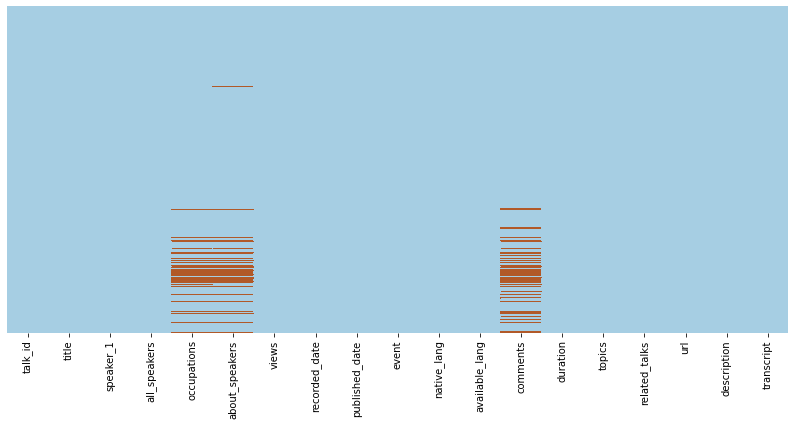

In [ ]:
# check for Null values
plt.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(tedtalk_df.isnull(), cbar=False,yticklabels=False,cmap='Paired')

In [ ]:
tedtalk_df.isna().sum().sort_values(ascending=False)

comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
talk_id             0
description         0
url                 0
related_talks       0
topics              0
duration            0
event               0
available_lang      0
native_lang         0
title               0
published_date      0
views               0
speaker_1           0
transcript          0
dtype: int64

As you can see above comments followed by occupations,about_speakers,all_speakers column is missing most no of null values

In [ ]:
# drop url column
tedtalk_df = tedtalk_df.drop(columns=['url'])

Dropping 'url' as it is of no use in model building

# **Exploratory Data Analysis and Visualization**

---



**Overview of Speaker column**

Who are the speakers of top 5 most watched TED talks?

In [ ]:
popular_df = tedtalk_df.nlargest(5, ['views'])
popular_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


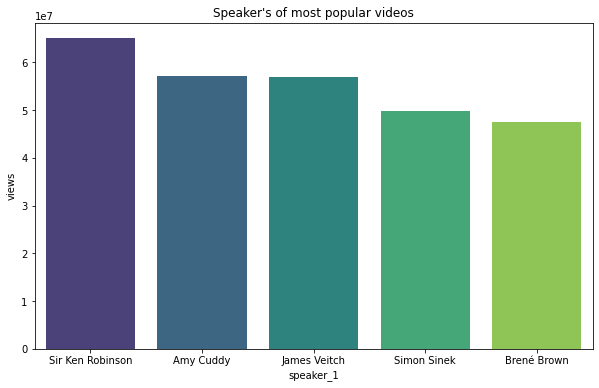

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular videos")
sns.barplot(x='speaker_1', y='views', data=popular_df,palette="viridis")

Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.

It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.

There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.




**Most popular speaker according to total views on their talks?**

In [ ]:
popular_speaker_df = tedtalk_df.groupby('speaker_1').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


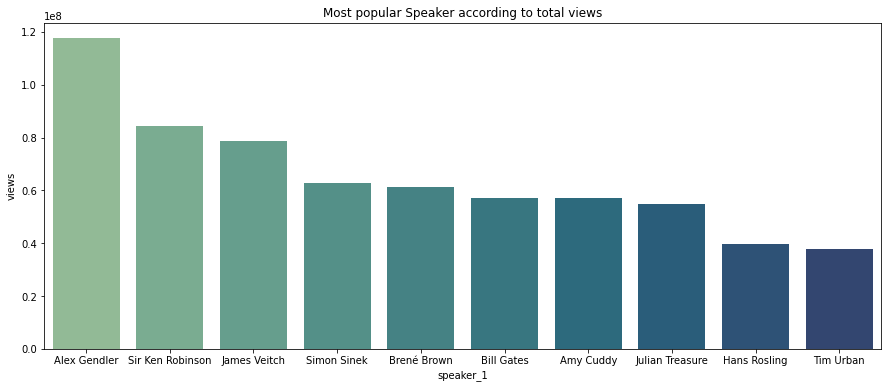

In [ ]:
#Plotting data using barplot
plt.figure(figsize=(15,6))
plt.title('Most popular Speaker according to total views')
sns.barplot(x='speaker_1', y='views', data=popular_speaker_df,palette='crest')

Alex Gendler is the most popular speaker followed by Sir Ken Robinson

**Overview of Event Column**

**Let's find out which is the most frequent and most popular event in TED?**

In [ ]:
#find most frequent event
popular_event_df = tedtalk_df.groupby('event').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_event_df

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


In [ ]:
#find most popular event
pop_event_df=tedtalk_df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views']).reset_index()
pop_event_df

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


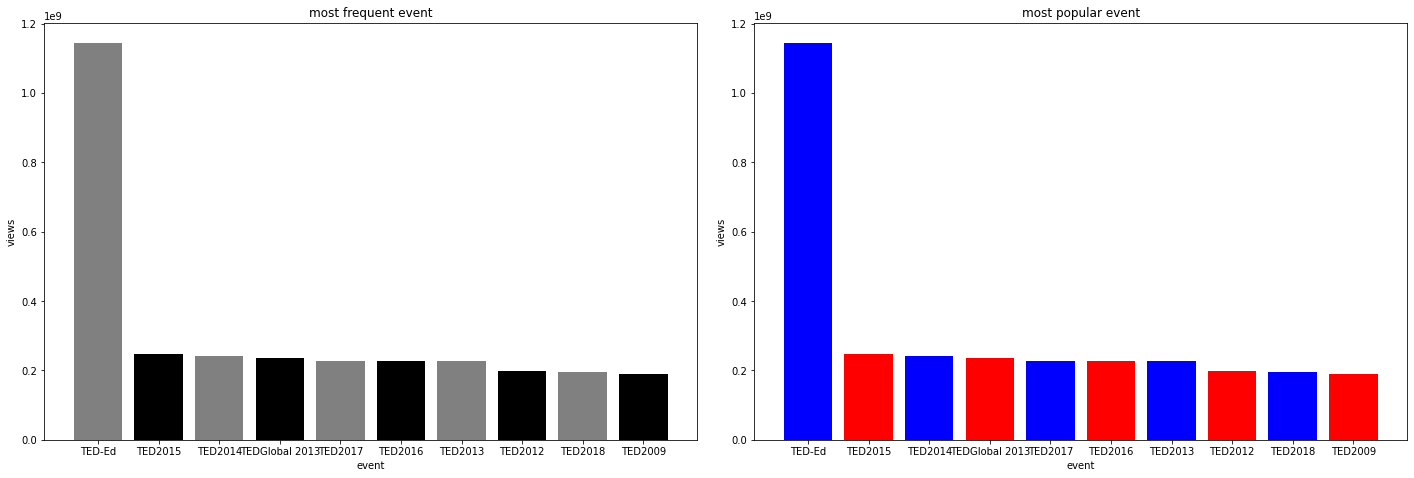

In [ ]:
# Plotting both graphs
#setting x and y values in the plot
x = popular_event_df['event']
y = popular_event_df['views']
x1 = pop_event_df['event']
y1 = pop_event_df['views']

plt.subplots(figsize=(20, 7))
 
# using subplot function and creating plot one
plt.subplot(1, 2, 1)
plt.bar(x, y, color=['grey','black'])
plt.title('most frequent event')
plt.xlabel('event')
plt.ylabel('views')
 
# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt.bar(x1, y1,color=['blue','red'])
plt.title('most popular event')
plt.xlabel('event')
plt.ylabel('views')
# space between the plots
plt.tight_layout(2)
 
# show plot
plt.show()

TED-Ed is the most frequent event category with 556 entries followed by TED2017 and TED2018

TED-Ed is the most popular event category having maximum number of total views followed by TED2015.

**Overview of title column**

**exploring the most frequent words in title**

In [ ]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from PIL import Image

There are 157160 words in the combination of all titles.


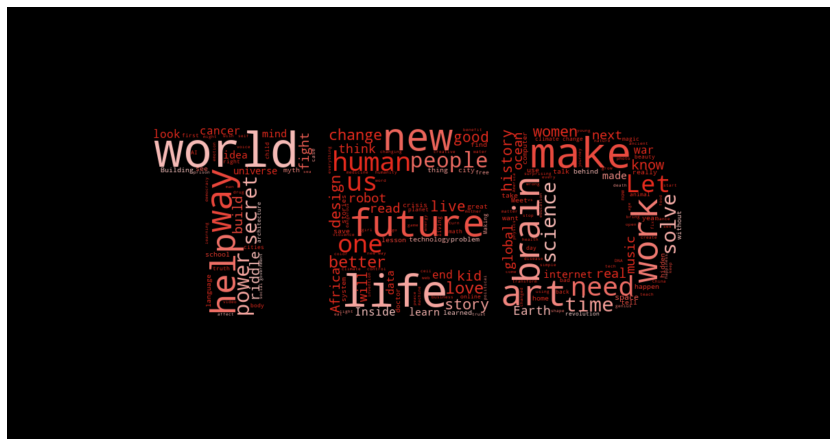

In [ ]:
#making of word cloud from title column
text = " ".join(topic for topic in tedtalk_df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
stopowords=set(STOPWORDS)
Image_file=('/content/drive/MyDrive/almabetter/capstone project2/ted-logo-fb.png')
mask=np.array(Image.open(Image_file))
wordcloud= WordCloud(background_color="black",mask=mask, width=800, height=400).generate(text)
image_colours=ImageColorGenerator(mask)
plt.axis("off")
plt.rcParams["figure.figsize"] = (17,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud.recolor(color_func=image_colours), interpolation='bilinear')
plt.show()

Majoriity of Titles contains words like life, world, make, new, future, art.

**Most popular title w.r.t views**

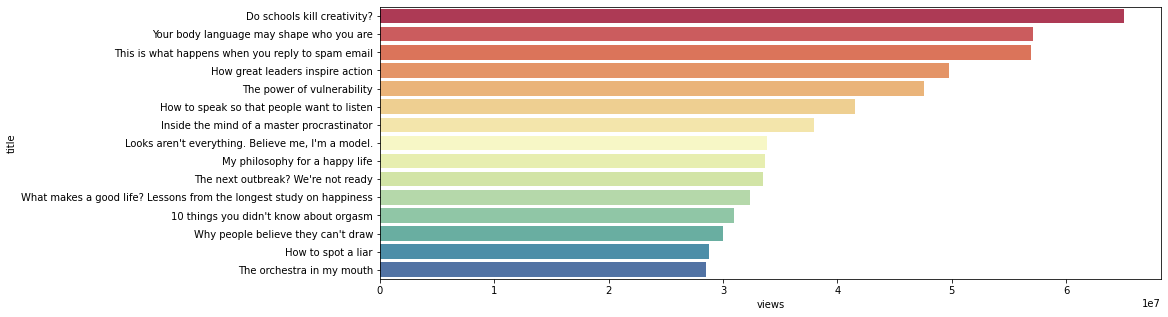

In [ ]:
popular_title =tedtalk_df[['title','views']].groupby('title').agg({'views' : 'mean'}).reset_index().sort_values(by=['views'],ascending=False).head(15)
plt.rcParams["figure.figsize"] = (14,5)
sns.barplot(x='views',y='title',data=popular_title,palette='Spectral')

Most popular title is "Do schools kill creativity?" with 60+ million views

**Let's have a look at most popular topic tags**

There are 404126 words in the combination of all topics.


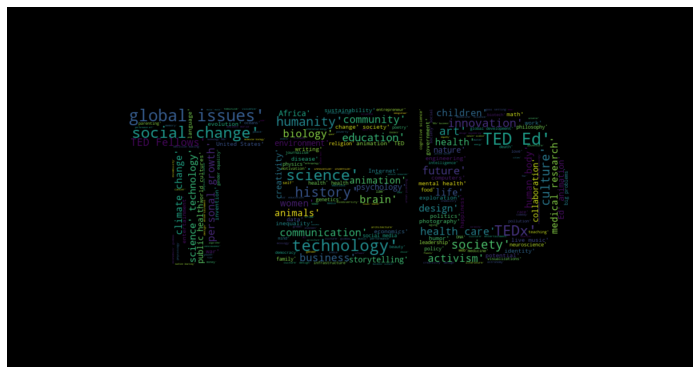

In [ ]:
text = " ".join(topic for topic in tedtalk_df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black",mask=mask,mode="RGBA",width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (17,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Most popular tags are global issues, technology, science Ted ED, social change

**Overview of Occupations column**

In [ ]:
#replacing Nan values of occupations column with other 
for index, row in tedtalk_df.iterrows():
    if pd.isnull(row['occupations']):
        tedtalk_df['occupations'][index] = str({0:'Other'})

In [ ]:
#applying eval function on occupations column
tedtalk_df['occupations'] = tedtalk_df.apply(lambda row: eval(row['occupations']), axis=1)

In [ ]:
#defining a new feature called occupation
tedtalk_df['occupation'] = 'other'


In [ ]:
#iterating through the each row and extracting occupations of speakers
for index, row in tedtalk_df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    tedtalk_df.loc[index,'occupation'] = str(occup_list)

In [ ]:
#Checking the number of unique occupation in event column.
len(tedtalk_df['occupation'].unique())

1552

[Text(0.5, 1.0, "top 15 most frequent speaker's occupations")]

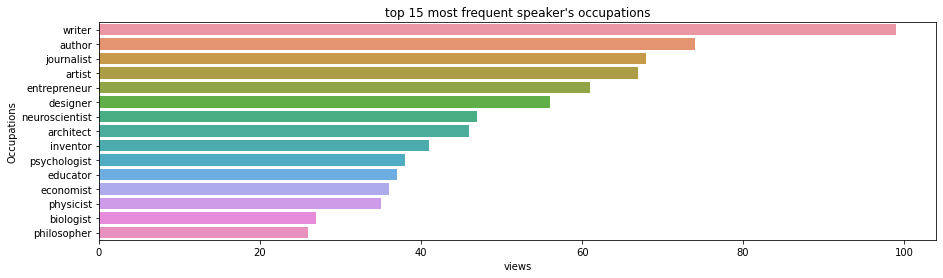

In [ ]:
#Printing the top 15 most frequent speaker's occupations
occ_df=tedtalk_df[tedtalk_df['occupation']!='O']
plt.rcParams["figure.figsize"] = (15,4)
a=sns.barplot(data = occ_df, y = occ_df['occupation'].value_counts(ascending=False).head(15).index,x = occ_df['occupation'].value_counts(ascending=False).head(15).values)
a.set(xlabel='views',ylabel='Occupations')
a.set(title="top 15 most frequent speaker's occupations")

Most of the speakers are writer followed by author and journalist.

**Overview of published_date**

Extracting day,month and year from published_date column

In [ ]:
#applying strptime on published_date column
import datetime
tedtalk_df['published_date'] = tedtalk_df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
#extracting release day, month and year from the published date column
tedtalk_df['published_date_day'] = tedtalk_df['published_date'].apply(lambda x: x.weekday())
tedtalk_df['published_date_month']=tedtalk_df['published_date'].apply(lambda x: x.month)
tedtalk_df['published_date_year'] = tedtalk_df['published_date'].apply(lambda x: x.year)

In [ ]:
#encoding of published_date_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tedtalk_df['published_date_day']=tedtalk_df['published_date_day'].map(week_day)

checking which day of the month has max releases

In [ ]:
#checking the day of the month having maximum release date 
freq_rel_day=tedtalk_df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)


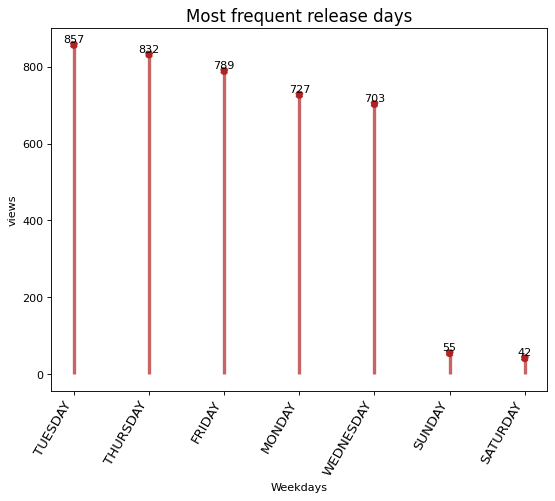

In [ ]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(8,6), dpi= 80)
ax.vlines(x=freq_rel_day.index, ymin=0, ymax=freq_rel_day.views, color='firebrick', alpha=0.7, linewidth=3)
ax.scatter(x=freq_rel_day.index, y=freq_rel_day.views, s=40,linestyle="--", color='firebrick', alpha=1)
ax.set_xticks(freq_rel_day.index)
ax.set_xticklabels(freq_rel_day.published_date_day.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
plt.title("Most frequent release days",fontsize=15)
# Printing the count in graph
for row in freq_rel_day.itertuples():
    ax.text(row.Index, row.views+.5, s=round(row.views, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)
# Show the object
plt.xlabel('Weekdays')
plt.ylabel('views')
plt.show() 

Most frequent releases are on Tuesday

**Let's check the best release day of the week with respect to average views**

In [ ]:
#checking popular release day wrt views
pop_rel_day=tedtalk_df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)


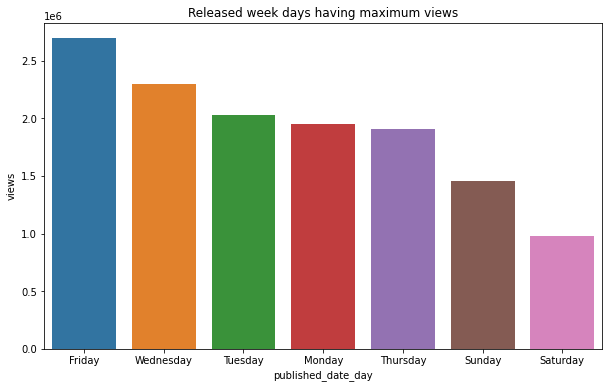

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='published_date_day',y='views',data=pop_rel_day)

Most videos are published on Tuesday followed by Thursday.

But the videos published on Friday have more views followed by wednesday.

Friday release is impacting the views of the video.

**Which month has more no of release?**

In [ ]:
#release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
tedtalk_df['published_date_month']=tedtalk_df['published_date_month'].map(month_dict)

In [ ]:
#checking months having maximum release 
freq_rel_month=tedtalk_df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
freq_rel_month

,published_date_month,views
0,April,423
1,March,419
2,Feb,412
3,Oct,350
4,Jan,348
5,Sep,347
6,May,312
7,June,310
8,Nov,305
9,July,278


**Which month has highest average views?**

In [ ]:
#Printing the most popular release month according to average Views
pop_rel_month=tedtalk_df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)
pop_rel_month

,published_date_month,views
0,March,2.644200e+06
1,May,2.449977e+06
2,Sep,2.224862e+06
3,April,2.180815e+06
4,Feb,2.135949e+06
5,July,2.127899e+06
6,June,2.125505e+06
7,Dec,2.109443e+06
8,Jan,2.014319e+06
9,Oct,1.909282e+06


**Plotting both graphs**

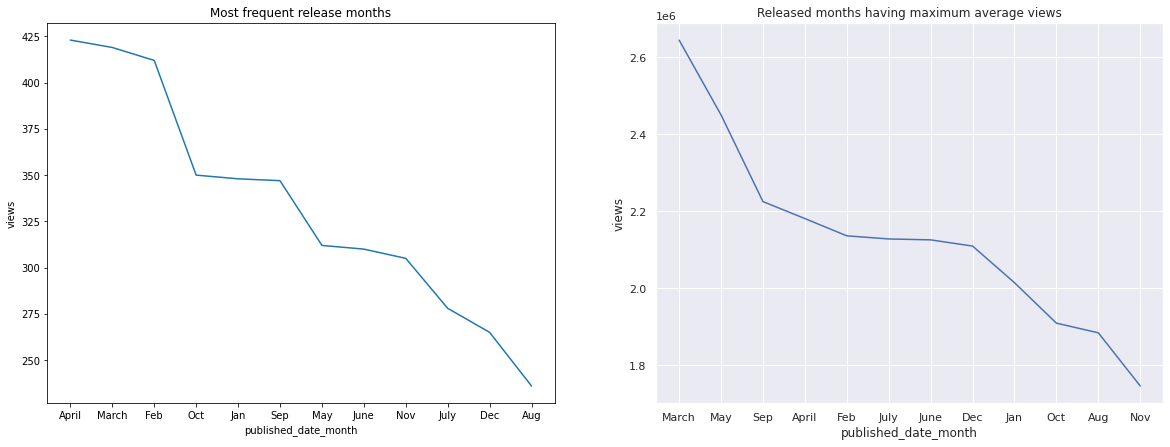

In [ ]:
# plotting the months having maximum release 
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.lineplot(x='published_date_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

#plotting most popular release month according to average Views
plt.subplot(1,2,2)
sns.set_theme(style="whitegrid")
plt.title('Released months having maximum average views')
sns.lineplot(x='published_date_month',y='views',data=pop_rel_month)
plt.show()

April have maximum released videos, But the videos released in March are more popular

In [ ]:
#checking years having maximum release 
freq_rel_year=tedtalk_df[['published_date_year','views']].groupby('published_date_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)
freq_rel_year

,published_date_year,views
0,2019,702
1,2018,477
2,2017,315
3,2012,303
4,2011,255
5,2013,242
6,2016,242
7,2014,240
8,2010,230
9,2015,220


In [ ]:
#Printing the most popular release years according to AVERAGE Views
pop_rel_year=tedtalk_df[['published_date_year','views']].groupby('published_date_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)
pop_rel_year

,published_date_year,views
0,2006,4.937003e+06
1,2013,3.012435e+06
2,2015,2.806775e+06
3,2016,2.734725e+06
4,2014,2.423564e+06
5,2012,2.196281e+06
6,2010,2.188767e+06
7,2017,2.160378e+06
8,2009,2.071610e+06
9,2019,1.939608e+06


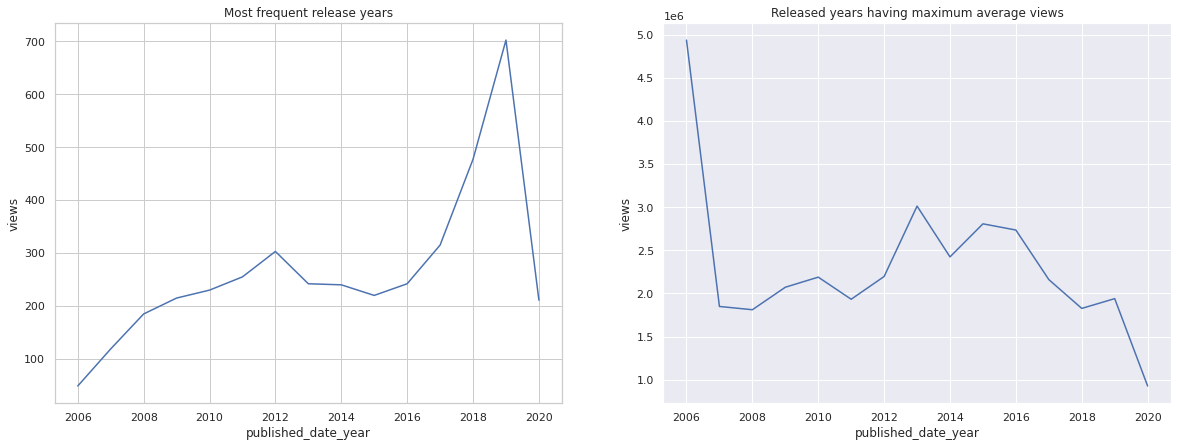

In [ ]:
#Plotting the years having maximum release 
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.lineplot(x='published_date_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

#Plotting most popular release years according to AVERAGE Views 
plt.subplot(1,2,2)
plt.title('Released years having maximum average views')
sns.lineplot(x='published_date_year',y='views',data=pop_rel_year)

**plotting both graphs**

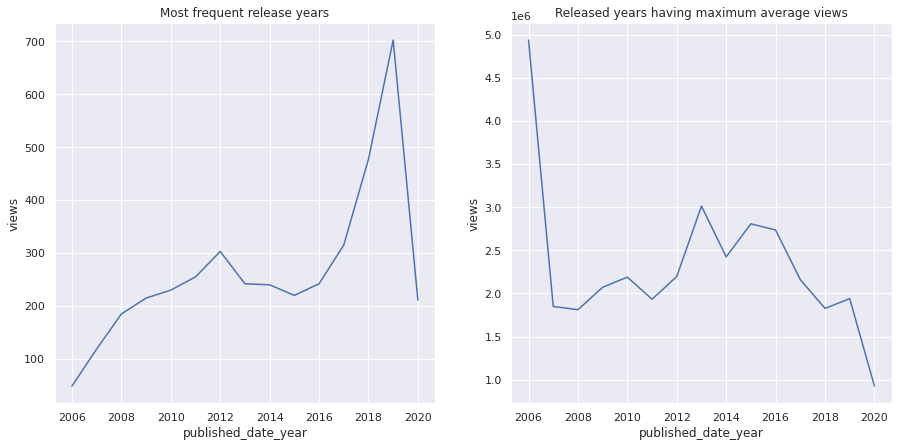

In [ ]:
#Plotting the years having maximum release 
plt.subplots(figsize=(15, 7))
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.lineplot(x='published_date_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

#Plotting most popular release years according to AVERAGE Views 
plt.subplot(1,2,2)
plt.title('Released years having maximum average views')
sns.lineplot(x='published_date_year',y='views',data=pop_rel_year)

Most videos are published in 2019 followed by 2018 and 2017.
But the videos published in 2006 are most viewed followed by 2013.

**Exploring numerical features**

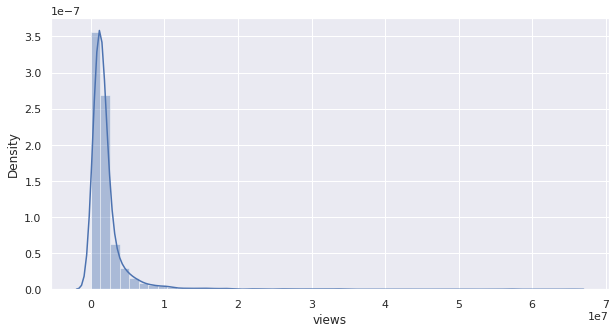

In [ ]:
#plotting the distplot of target variable
plt.figure(figsize=(10,5))
sns.distplot(tedtalk_df['views'])

our target variable is rightly skewed.

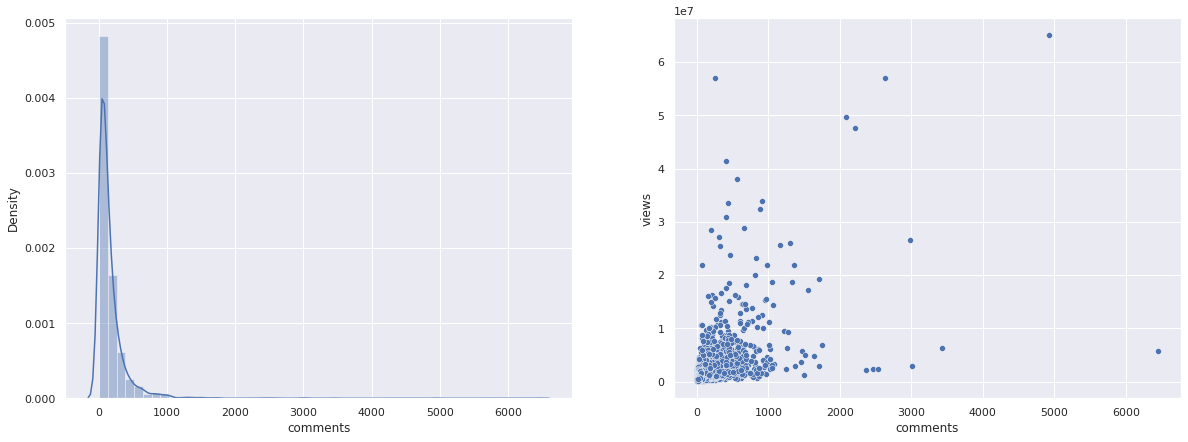

In [ ]:
##plotting the distplot of comments
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.distplot(tedtalk_df['comments'])
#plotting the scatterplot of comments
plt.subplot(1,2,2)
sns.scatterplot(x=tedtalk_df['comments'],y=tedtalk_df['views'],data=tedtalk_df)

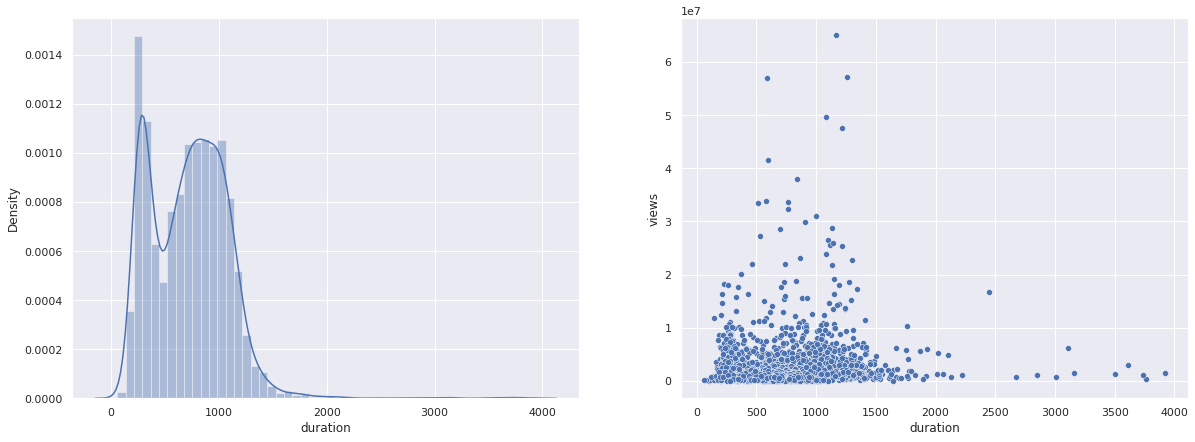

In [ ]:
#plotting the distplot of duration
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.distplot(tedtalk_df['duration'])
#plotting the scatterplot of duration
plt.subplot(1,2,2)
sns.scatterplot(x=tedtalk_df['duration'],y=tedtalk_df['views'],data=tedtalk_df)

# Feature Engineering

---



**Speaker_1 column**

since there is high number of cardinality in Speaker_1 Column, therefore applying mean encoding

In Mean Encoding each distinct value of categorical value is replaced with average value of target variable.

In [ ]:
#Applying Mean Encoding on speaker_1 column
mean_encoding = tedtalk_df.groupby('speaker_1')['views'].mean().to_dict()
tedtalk_df['speaker_1_avg_views']=tedtalk_df['speaker_1'].map(mean_encoding)

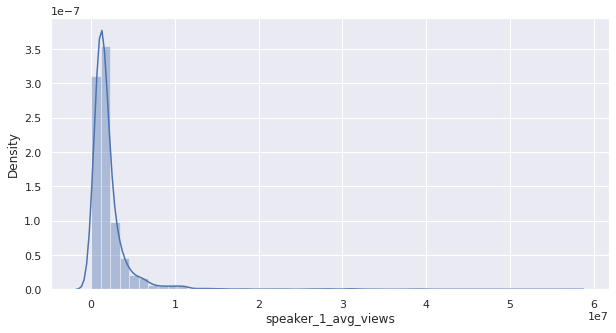

In [ ]:
#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(tedtalk_df['speaker_1_avg_views'])

**Event column**

Event column also faces high cardinality, therefore applying mean encoding

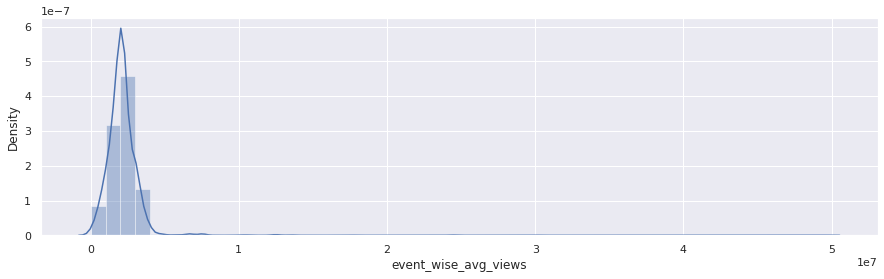

In [ ]:
#Applying Mean Encoding on event column
mean_encoding = tedtalk_df.groupby('event')['views'].mean().to_dict()
tedtalk_df['event_wise_avg_views']=tedtalk_df['event'].map(mean_encoding)
#Plotting the distplot of event_wise_avg_views
sns.distplot(tedtalk_df['event_wise_avg_views'])

**Topics column**

In [ ]:
tedtalk_df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [ ]:
#applying eval function on topics column and calculating length
tedtalk_df['topics'] = tedtalk_df.apply(lambda row: eval(row['topics']), axis=1)
tedtalk_df['num_of_tags'] = tedtalk_df.apply(lambda x: len(x['topics']), axis=1)

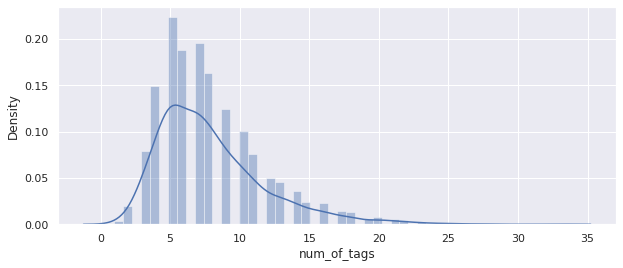

In [ ]:
#Plotting data using distplot
plt.figure(figsize=(10,4))
sns.distplot(tedtalk_df['num_of_tags'])

In [ ]:
#extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(tedtalk_df)):
  temp=tedtalk_df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)
      
len(unique_topics)

457

In [ ]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(tedtalk_df)):
    temp2=tedtalk_df['topics'][i]
    if(topic in temp2):
      temp+=tedtalk_df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(tedtalk_df)):
  temp=0
  temp_topic=tedtalk_df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

topics_avg_views = pd.Series(topics_wise_avg_views)
tedtalk_df['topics_wise_avg_views'] = topics_avg_views.values

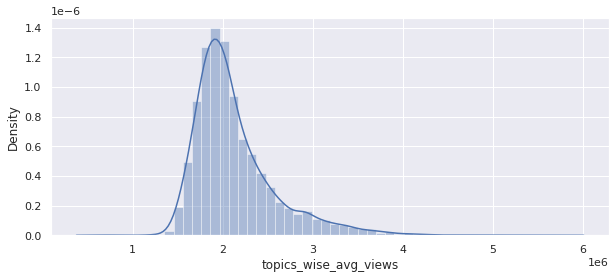

In [ ]:
#plotting topics_wise_avg_views
plt.figure(figsize=(10,4))
sns.distplot(tedtalk_df['topics_wise_avg_views'])

**Available language column**

In [ ]:
tedtalk_df['available_lang'] = tedtalk_df.apply(lambda row: eval(row['available_lang']), axis=1)

In [ ]:
len(tedtalk_df['available_lang'][10])


26

In [ ]:
#calculating number of language in each observation
tedtalk_df['num_of_lang'] = tedtalk_df.apply(lambda x: len(x['available_lang']), axis=1)


In [ ]:
tedtalk_df['num_of_lang'].head()

0    43
1    49
2    26
3    35
4    62
Name: num_of_lang, dtype: int64

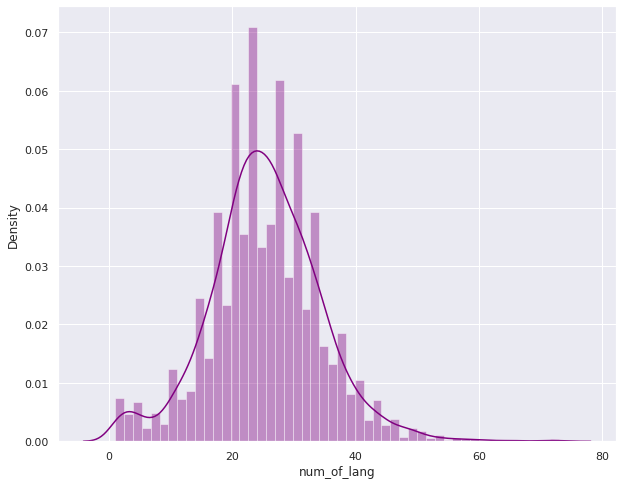

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(tedtalk_df['num_of_lang'],color='purple')

In [ ]:
#calculating video age from published_date_year
tedtalk_df['video_age']=2021-tedtalk_df['published_date_year']


In [ ]:
# dropping published_date as it is of no use now
tedtalk_df=tedtalk_df.drop(columns='published_date')

In [ ]:
#applying eval function on available_lang column
tedtalk_df['related_talks'] = tedtalk_df.apply(lambda row: eval(row['related_talks']), axis=1)

In [ ]:
tedtalk_df['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 54715: 'How we can turn the tide on climate',
 29968: 'The most important thing you can do to fight climate change: talk about it',
 2339: "Climate change is happening. Here's how we adapt"}

In [ ]:
#defining a new feature called related_views
tedtalk_df['related_talks_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in tedtalk_df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(tedtalk_df)):
      if (tedtalk_df.loc[i,'talk_id']) in id_list:
        temp+=tedtalk_df.loc[i,'views']

    tedtalk_df.loc[index,'related_talks_views']=temp//6

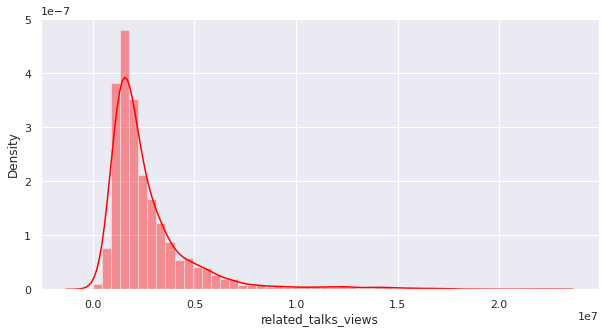

In [ ]:
#Let's plot the related_views column
plt.figure(figsize=(10,5))
sns.distplot(tedtalk_df['related_talks_views'],color='red')

# Data cleaning

In [ ]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'description', 'transcript', 'occupation', 'published_date_day',
       'published_date_month', 'published_date_year', 'speaker_1_avg_views',
       'event_wise_avg_views', 'num_of_tags', 'topics_wise_avg_views',
       'num_of_lang', 'video_age', 'related_talks_views'],
      dtype='object')

In [ ]:
#dropping unimportant columns from the dataframe.
tedtalk_df.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'event', 
                         'native_lang', 'available_lang' ,'recorded_date','topics','related_talks','transcript', 
                         'occupation' ,'description','published_date_year', 'published_date_day', 'published_date_month'],inplace=True)
                         

**Outlier Treatment**

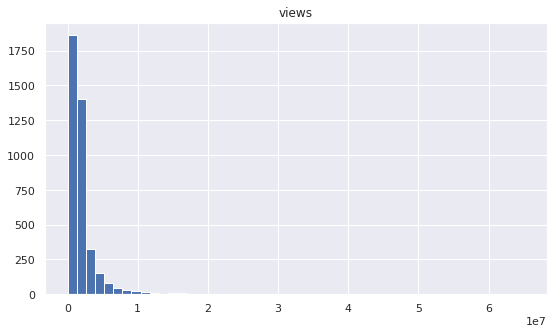

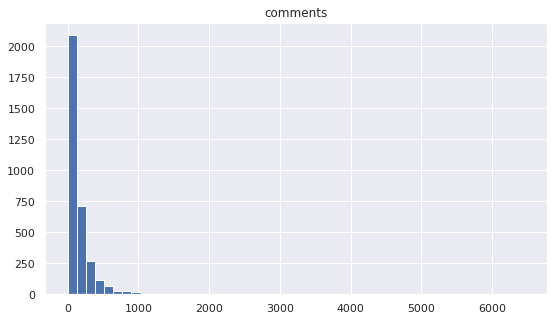

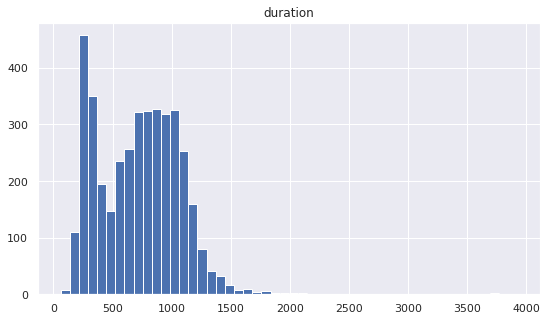

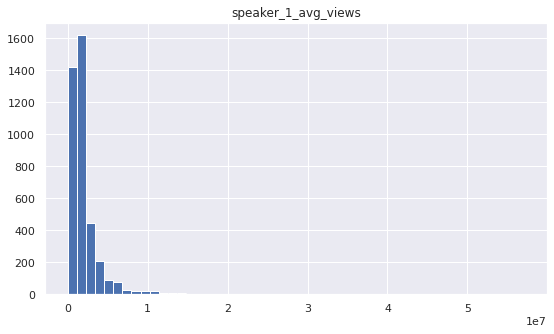

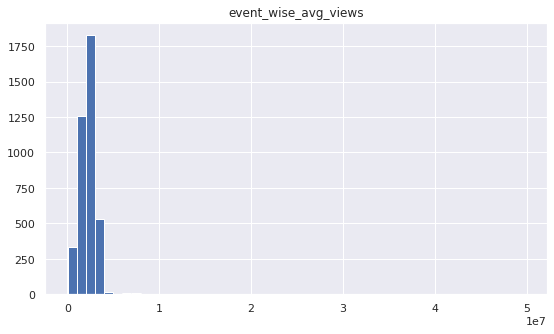

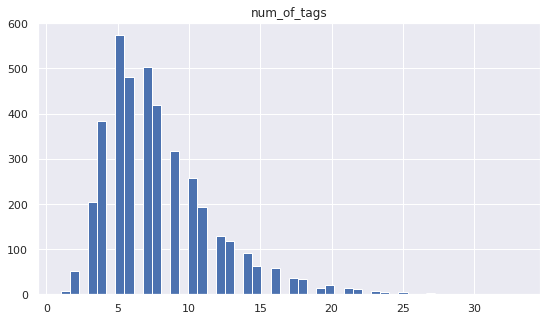

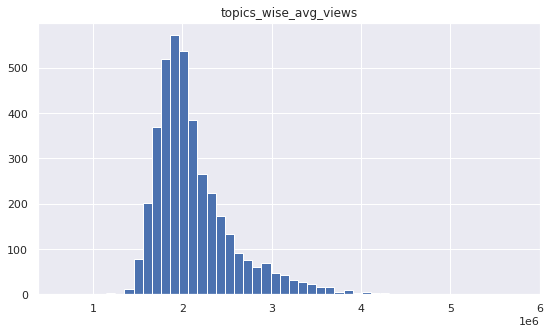

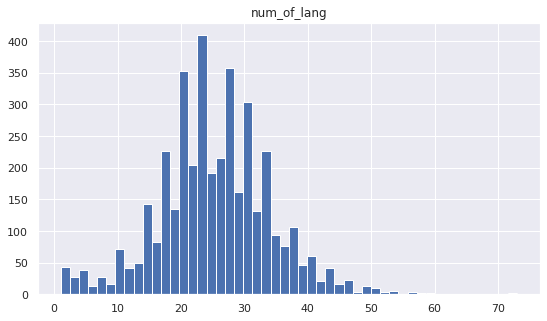

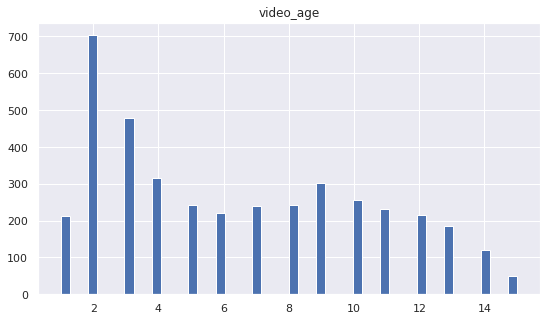

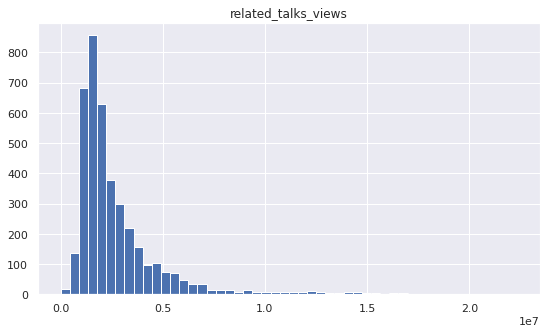

In [ ]:
#Plotting histplot for all numeric columns
numeric_features = tedtalk_df.describe().columns

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca()
    feature = tedtalk_df[col]
    feature.hist(bins=50, ax = ax) 
    ax.set_title(col)
plt.show()

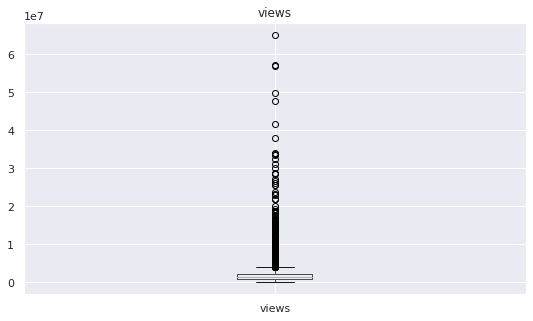

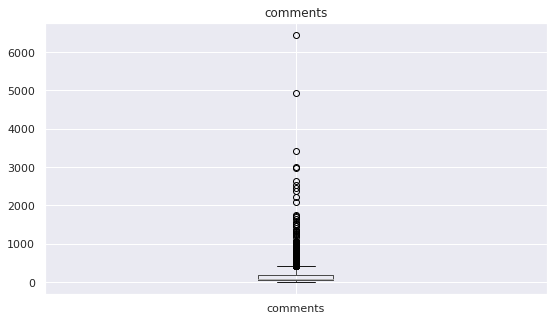

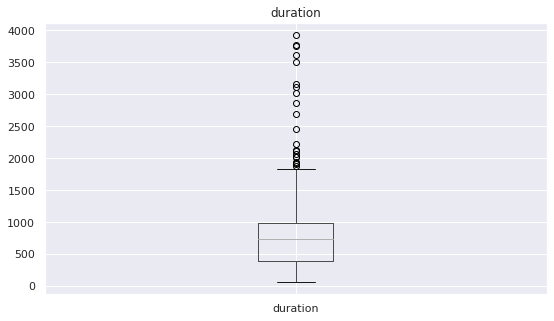

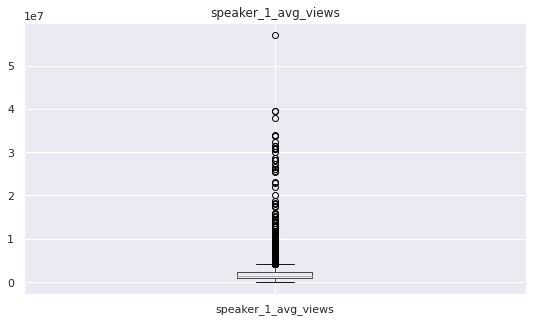

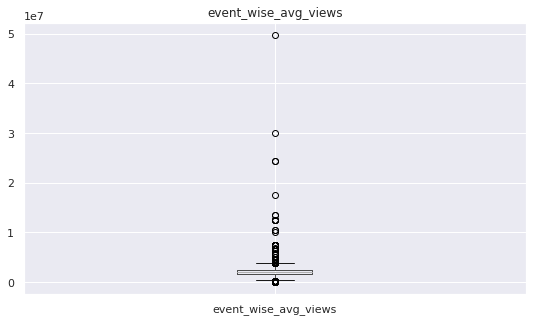

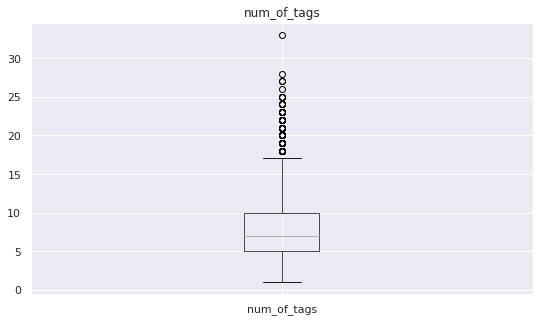

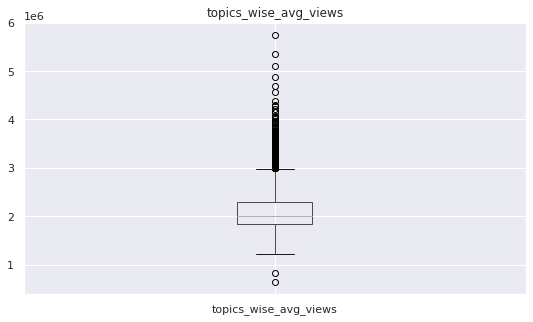

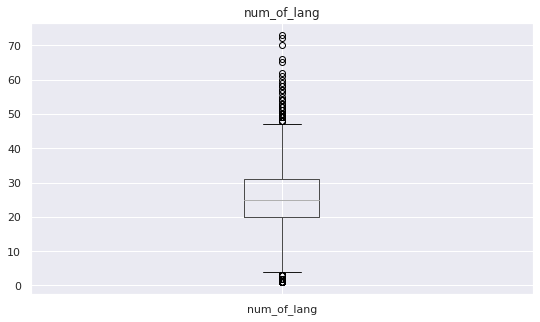

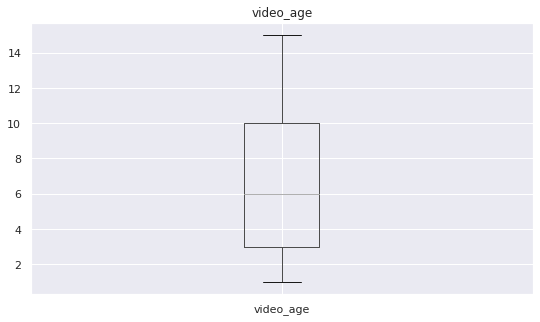

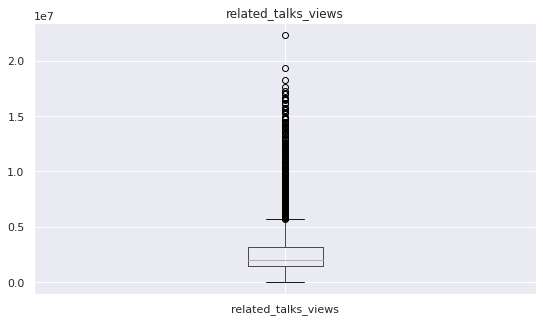

In [ ]:
#Plotting boxplot for all numeric columns to check outliers
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca()
    tedtalk_df.boxplot(column=col)
    ax.set_title(col)
plt.show()

In [ ]:
#checking the outliers
Q1 = tedtalk_df.quantile(0.25)
Q3 = tedtalk_df.quantile(0.75)
IQR = Q3 - Q1

((tedtalk_df < (Q1 - 1.5 * IQR)) | (tedtalk_df > (Q3 + 1.5 * IQR))).sum()

views                    393
comments                 261
duration                  21
speaker_1_avg_views      373
event_wise_avg_views     156
num_of_tags              116
topics_wise_avg_views    242
num_of_lang              121
video_age                  0
related_talks_views      300
dtype: int64

We have outliers in few columns which needs to be treated well.

I am replacing the outliers with the extreme values.

In [ ]:
# Replacing outliers with extreme values
for i in ['comments','duration','num_of_lang','num_of_tags','related_talks_views','views','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = tedtalk_df[i].quantile(0.25)
  Q3 = tedtalk_df[i].quantile(0.75)
  IQR = Q3 - Q1

  tedtalk_df[i]=np.where(tedtalk_df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(tedtalk_df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),tedtalk_df[i]))

In [ ]:
#Let's check the outliers again
Q1 = tedtalk_df.quantile(0.25)
Q3 = tedtalk_df.quantile(0.75)
IQR = Q3 - Q1
((tedtalk_df < (Q1 - 1.5 * IQR)) | (tedtalk_df > (Q3 + 1.5 * IQR))).sum()

views                    0
comments                 0
duration                 0
speaker_1_avg_views      0
event_wise_avg_views     0
num_of_tags              0
topics_wise_avg_views    0
num_of_lang              0
video_age                0
related_talks_views      0
dtype: int64

Now, there are no outliers present

In [ ]:
#separating the dependent and independent variables
y=tedtalk_df['views']
X=tedtalk_df.drop(columns='views')

In [ ]:
X.head(2)

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_tags,topics_wise_avg_views,num_of_lang,video_age,related_talks_views
0,272.0,977.0,2190599.25,3.778944e+06,9.0,1750846.0,43.0,15,1659584.0
1,413.0,1190.0,3987156.10,3.778944e+06,11.0,2290338.0,47.5,15,1573950.0


**Null value treatment**

In [ ]:
#checking for null values
X.isna().sum()

comments                 655
duration                   0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_tags                0
topics_wise_avg_views      0
num_of_lang                0
video_age                  0
related_talks_views        0
dtype: int64

Here, we have around 655 NaN values in comments column.


In [ ]:
#Taking features for using in KNNImputer
outlier_df=['duration','comments','speaker_1_avg_views','event_wise_avg_views']

**Using KNNImputer to impute missing values**

In [ ]:
# Before applying KNNImputer, we have to scale features to avoid bias.
scaler = MinMaxScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(X[outlier_df]))
# transform the dataset
X[outlier_df] = imputer.transform(scaler.fit_transform(X[outlier_df]))
#again applying inverse_transform on the data
X[outlier_df] = scaler.inverse_transform(X[outlier_df])

In [ ]:
#let's check for nan values again
X.isna().sum()

comments                 0
duration                 0
speaker_1_avg_views      0
event_wise_avg_views     0
num_of_tags              0
topics_wise_avg_views    0
num_of_lang              0
video_age                0
related_talks_views      0
dtype: int64

No null values are there


**Transformations**

Applying various transformations on numeric columns to convert data to normal distribution


In [ ]:
#import libraries
import scipy.stats as stat
import pylab

In [ ]:
# Let's plot Q-Q plot for numeric features
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

Q Q Plots (Quantile-Quantile plots) are plots of two quantiles against each other. The purpose of Q Q plots is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the Q Q plot; if the two data sets come from a common distribution, the points will fall on that reference line.

**Q-Q plot for comments**

before transformation



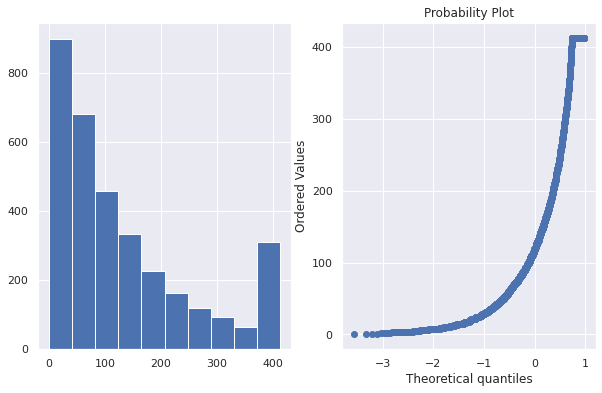

In [ ]:
plot_data(tedtalk_df,'comments')

After transformation

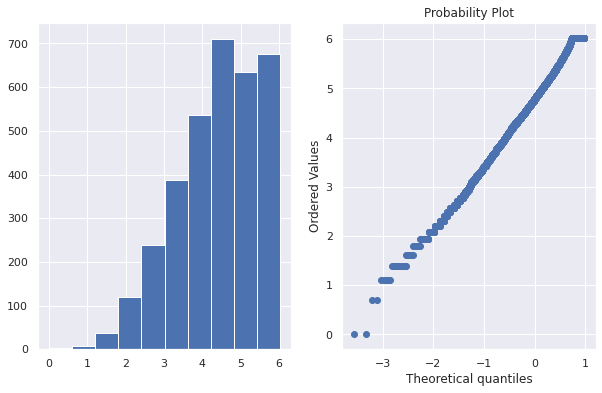

In [ ]:
# applying log transformation
tedtalk_df['comments']=np.log1p(tedtalk_df['comments'])
plot_data(tedtalk_df,'comments')

**Q-Q plot for duration**


Before transformation

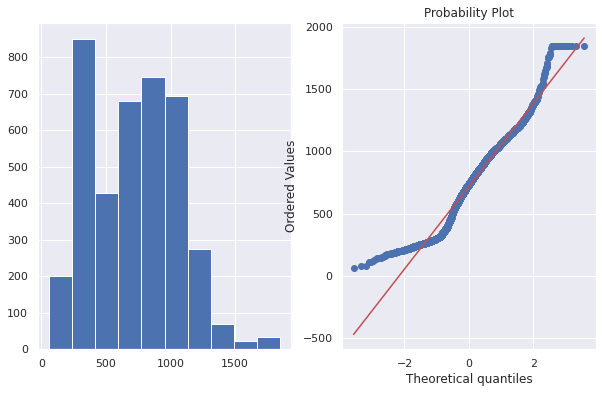

In [ ]:
plot_data(tedtalk_df,'duration')

After transformation

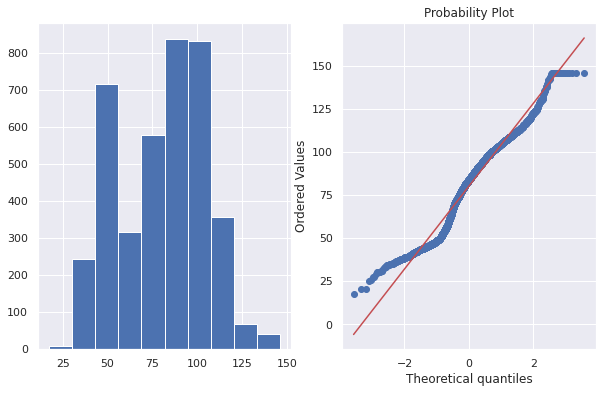

In [ ]:
# applying boxcox transformation
tedtalk_df['duration'],parameters=stat.boxcox(tedtalk_df['duration'])
plot_data(tedtalk_df,'duration')

**Q-Q plot for Event_wise_avg_views**

before transformation

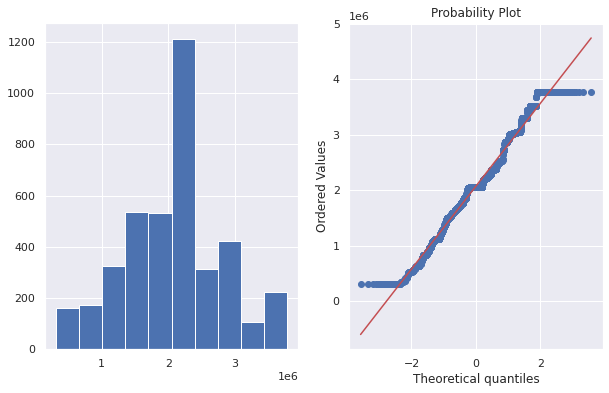

In [ ]:
plot_data(tedtalk_df,'event_wise_avg_views')

After transformation

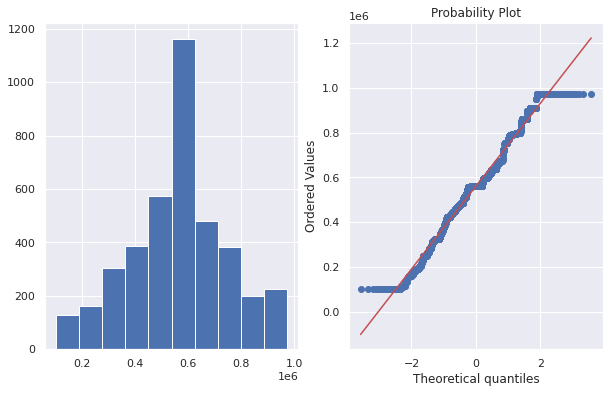

In [ ]:
# applying boxocox transformation
tedtalk_df['event_wise_avg_views'],parameters=stat.boxcox(tedtalk_df['event_wise_avg_views'])
plot_data(tedtalk_df,'event_wise_avg_views')

**Q-Q plot for num_of_tags**

before transformation

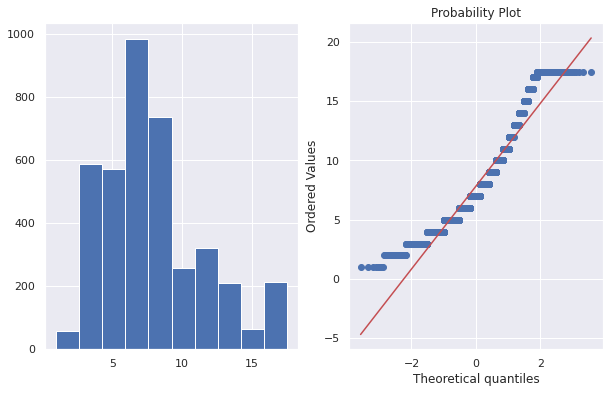

In [ ]:
plot_data(tedtalk_df,'num_of_tags')

Ater transformation

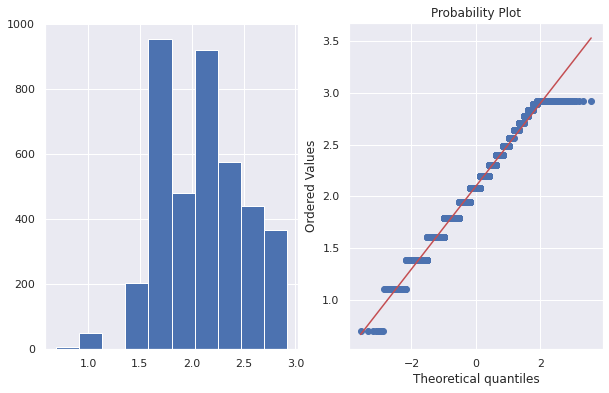

In [ ]:
# applying log transformation
tedtalk_df['num_of_tags']=np.log1p(tedtalk_df['num_of_tags'])
plot_data(tedtalk_df,'num_of_tags')

**Q-Q plot for topics_wise_avg_views**

before transformation

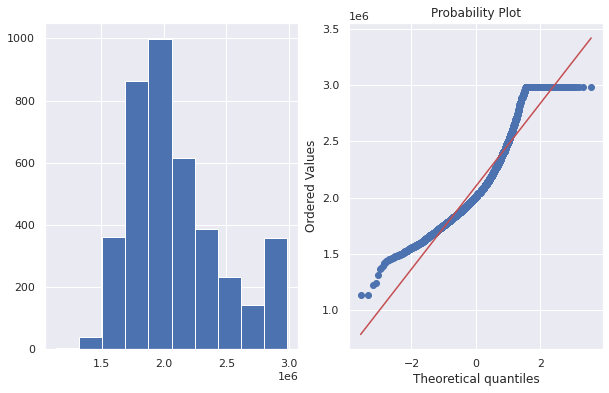

In [ ]:
plot_data(tedtalk_df,'topics_wise_avg_views')

After transformation

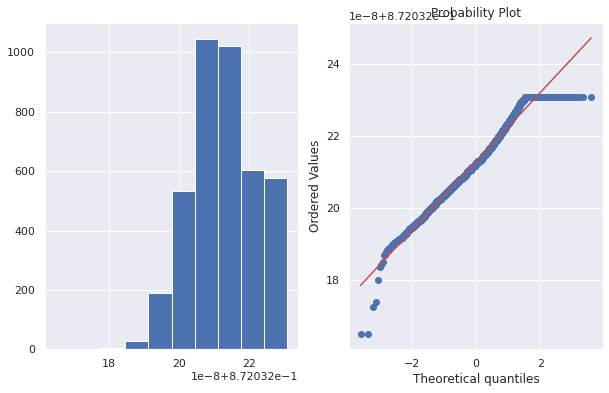

In [ ]:
# applying boxcox transformation
tedtalk_df['topics_wise_avg_views'],parameters=stat.boxcox(tedtalk_df['topics_wise_avg_views'])
plot_data(tedtalk_df,'topics_wise_avg_views')

**Q-Q plot for num_of_lang**

before transformation

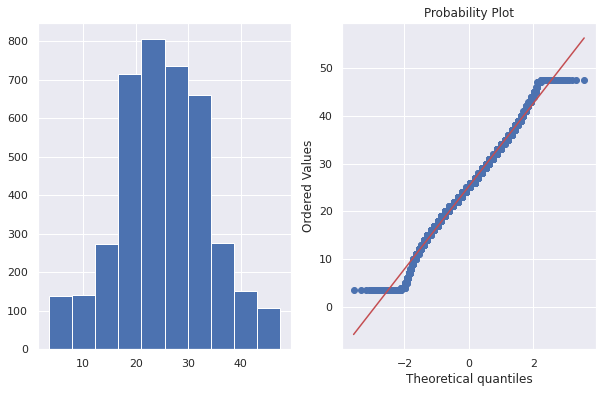

In [ ]:
plot_data(tedtalk_df,'num_of_lang')

After transformation

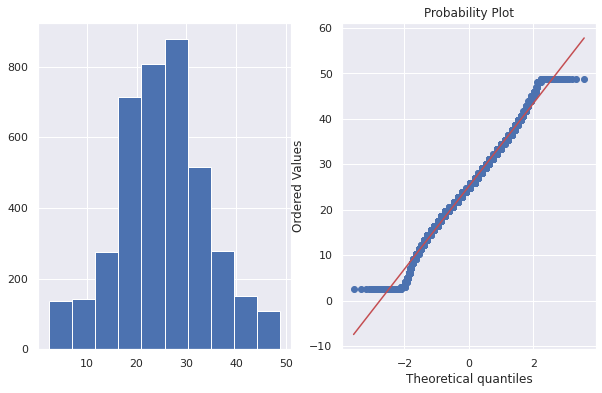

In [ ]:
# applying boxcox transformation
tedtalk_df['num_of_lang'],parameters=stat.boxcox(tedtalk_df['num_of_lang'])
plot_data(tedtalk_df,'num_of_lang')

**Q-Q plot for video_age**

before transformation

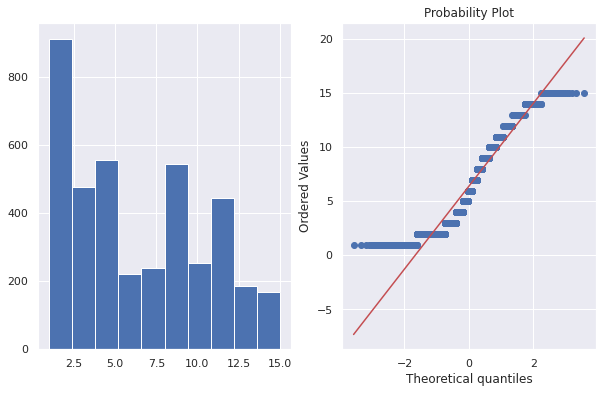

In [ ]:
plot_data(tedtalk_df,'video_age')

After transformation

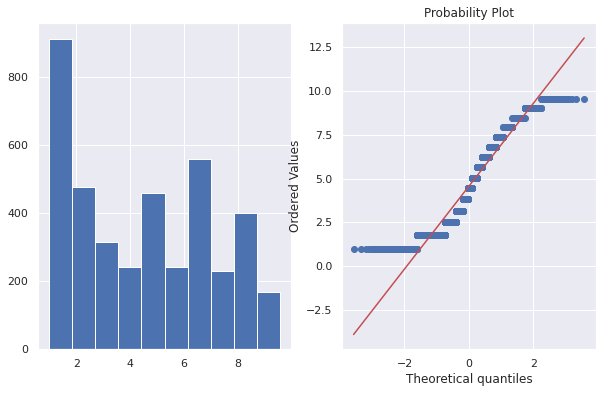

In [ ]:
# applying exponential transformation
tedtalk_df['video_age']=tedtalk_df.video_age**(1/1.2)
plot_data(tedtalk_df,'video_age')

**Q-Q plot for related_talks_views**

before transformation

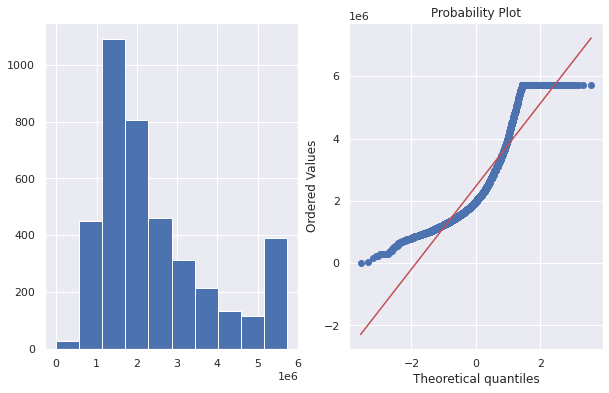

In [ ]:
plot_data(tedtalk_df,'related_talks_views')

After transformation

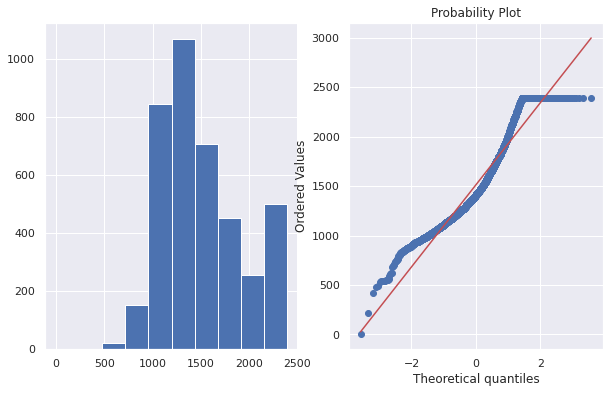

In [ ]:
# applying square root transformation
tedtalk_df['related_talks_views']=tedtalk_df.related_talks_views**(1/2)
plot_data(tedtalk_df,'related_talks_views')

QQ plot   for speaker_1_avg_views column

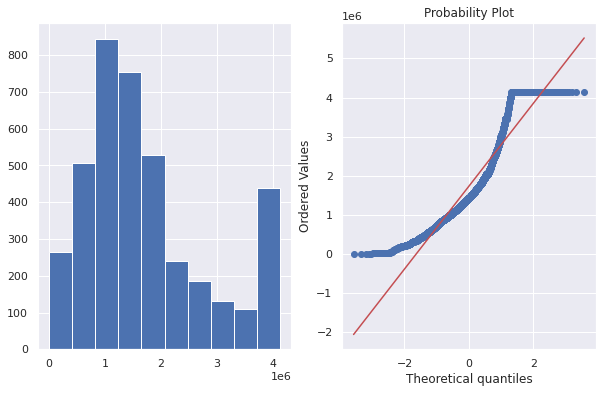

In [ ]:
plot_data(tedtalk_df,'speaker_1_avg_views')

After transformation

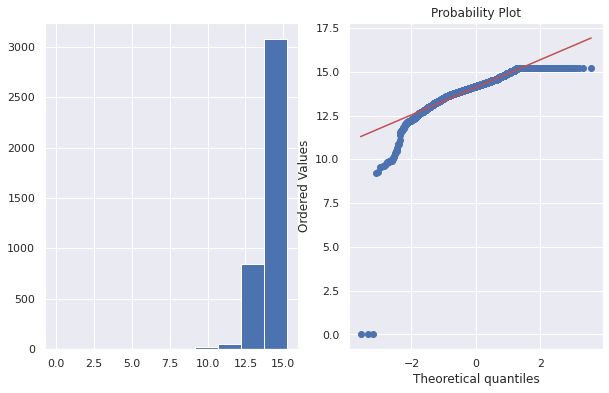

In [ ]:
# applying log transformation
tedtalk_df['speaker_1_avg_views']=np.log1p(tedtalk_df['speaker_1_avg_views'])
plot_data(tedtalk_df,'speaker_1_avg_views')

**Feature Selection**

---



In [ ]:
#printing the shape of features
X.shape


(4005, 9)

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
#finding the f scores of each features
f_scores = f_regression(X, y)
f_scores

(array([1.56930257e+03, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        2.22138034e+00, 8.21343686e+02, 9.43117088e+02, 7.26280093e-01,
        6.34241154e+02]),
 array([7.27669071e-290, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
        1.36190106e-001, 1.81039118e-164, 3.67017071e-186, 3.94142602e-001,
        4.87581533e-130]))

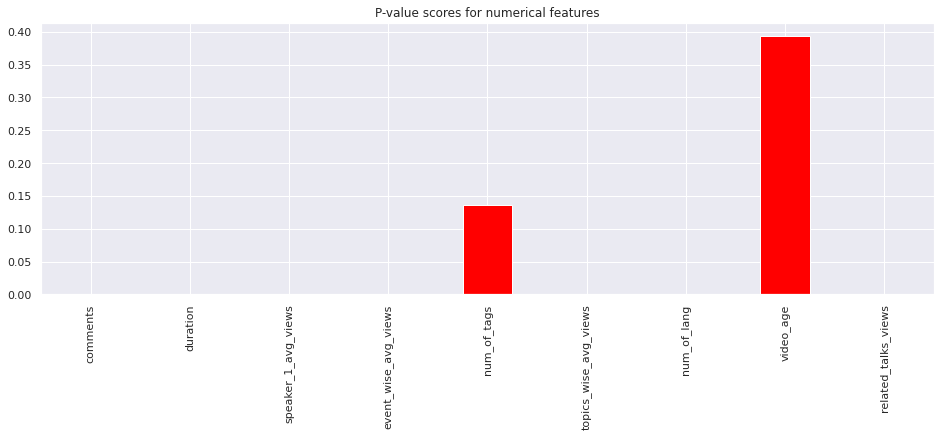

In [ ]:
#The second array consists of p-values that we need. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='red',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

In [ ]:
X.columns

Index(['comments', 'duration', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_tags', 'topics_wise_avg_views', 'num_of_lang', 'video_age',
       'related_talks_views'],
      dtype='object')

In [ ]:
#Let's take all the important features in a list.
ll=['comments', 'duration', 'num_of_lang', 'num_of_tags','event_wise_avg_views',
       'related_talks_views', 'speaker_1_avg_views','topics_wise_avg_views']
len(ll)
#let's take the important features
X=X[ll]

**Correlation matrix**

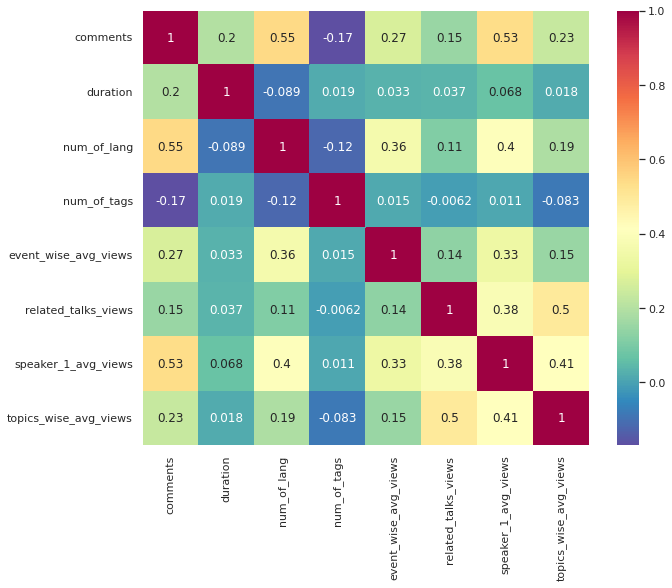

In [ ]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True, cmap='Spectral_r')

No highly correlated features found.

**Train Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Model Building**

---
**Fitting Regression model and Hypermetric Tuning**

Linear Regression model



In [ ]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)

y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE on test is 219668060390.61792
RMSE on test is 468687.59359579586
Training MAE: 269984.50
Test MAE: 261784.10


In [ ]:
reg.score(X_test,y_test)

0.8191986935070509

Despite of the fact that our features are not following linear assumption which we have checked earlier, this model is giving a satisfactory score.

**RandomForest Regressor**

In [ ]:
#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 96401.51
Test MAE: 229440.55
Target mean: 1661354.12
Target std: 1102595.71


It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.

**Hypermetric tuning using RandomizedSearchCV**

In [ ]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [ ]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_leaf=10,
                      min_samples_split=50, n_estimators=150)

In [ ]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 177941.01
Test MAE: 188985.54


In [ ]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8382202902482986
For test set the R_Squared for RFforest is 0.8156033206209917 and adjusted R_Squared is 0.8152341580997124


In [ ]:
#Defining the model
model =[
        ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=10,min_samples_leaf=10,min_samples_split=150,n_estimators=100,random_state=None)]
      ]
#Let's run the the model and store the results in a dataframe
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_rf = pd.DataFrame(model_data)

#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,194448.312067,198446.460537,0.822242,0.813493,464841.027669,476025.460417


**Feature importance**

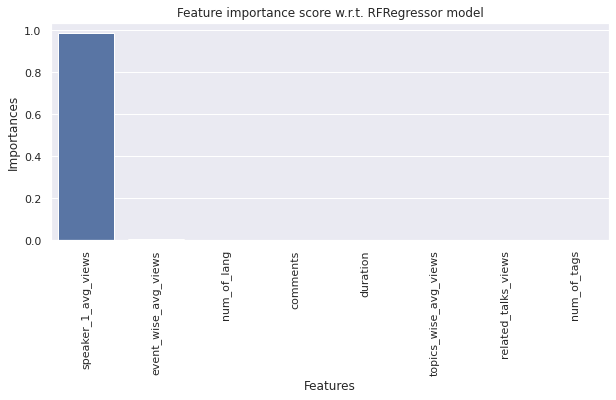

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(10, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show()

speaker_1_avg_views is the most important feature in **RandomForestregressor**





**XGBoost Regressor**

In [ ]:
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

**Hypermetric tuning using RandomizedSearchCV**

In [ ]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[19:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.3s
[19:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.2s
[19:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.2s
[19:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.2s
[19:19:59] WARNING: /wo

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
#finding xgb_optimal_model
xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=100,
             n_estimators=50)

In [ ]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')


r_sqr value for train: 0.9003193058046478
For test set the R_Squared for XGBoost is 0.8312618383055487 and adjusted R_Squared is 0.8309240241680222


In [ ]:
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 178306.07
Test MAE: 220603.95


In [ ]:
#Defining the model
model = [
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=50,
             min_samples_split=100, n_estimators=50)]         
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_xgb = pd.DataFrame(model_data)
#printing the results_df_xgb
results_df_xgb

[19:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,XGBRegressor:,178306.065248,220603.953167,0.900319,0.831262,348092.977714,452782.186293


**Feature importance**

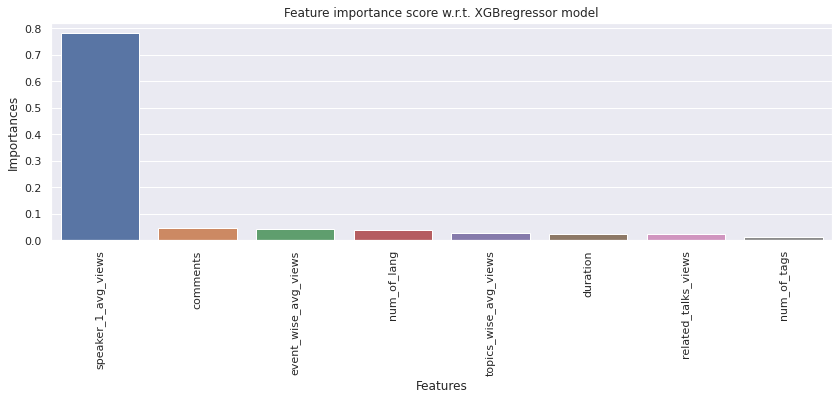

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

speaker1_avg_views is the most important feature in XGBregressor model followed by event_wise_avg_views.

In [ ]:
#Defining all the models
models = [
           ['LinearRegression', LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=10,min_samples_leaf=10,min_samples_split=150,n_estimators=100,random_state=None)],    
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=50,
             min_samples_split=100, n_estimators=50)]          
        ]

In [ ]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))   
    curr_model_data['Adjusted_R2_score_train'] = 1 - (1-(r2_score(y_train,curr_model.predict(X_train))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    curr_model_data['Adjusted_R2_score_test'] = 1 - (1-(r2_score(y_test,curr_model.predict(X_test))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[19:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#printing the results in dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,Adjusted_R2_score_train,Adjusted_R2_score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression,269984.503141,261784.096106,0.815410,0.819199,0.815040,0.818837,473690.117306,468687.593596
1,Lasso:,269984.449394,261784.044474,0.815410,0.819199,0.815040,0.818837,473690.117306,468687.580883
2,Ridge:,269984.309097,261783.907938,0.815410,0.819199,0.815040,0.818837,473690.117307,468687.543803
3,KNeighborsRegressor:,231054.636746,281932.195424,0.856594,0.783506,0.856306,0.783072,417516.848940,512868.181145
4,RandomForest,194448.312067,198446.460537,0.822242,0.813493,0.821886,0.813120,464841.027669,476025.460417
5,XGBRegressor:,178306.065248,220603.953167,0.900319,0.831262,0.900120,0.830924,348092.977714,452782.186293


# **Conclusion**

---

Performed Exploratory data analysis on various features, then carried out feature engineering and encoding of categorical columns, handled missing values in the dataset, dealt with outliers present in the dataset , performed transformations like log, sqrt and boxcox on numerical features to convert them to gaussian distribution, then carried out feature selection and build various models



**Following models have been used:**

Linear Regressor

Random Forest Regressor

XGB Regressor

Evaluated these models on various metrics like MSE, RMSE, MAE ,R2 score and Adjusted R2 score. Finally selected the best model out of these.
In all these models our errors have been in the range of 2,00,000 which is around 10% of the average views. The model has been able to correctly predict views 90% of the time. After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing and reducing learning rate. Given that only have 10% errors, our models have performed very well on unseen data due to various factors like feature selection, correct model selection.
After evaluating the performance of all the models, the best model is Random Forest Regressor based on MAE because MAE is linear and robust to outliers.
